<a href="https://colab.research.google.com/github/rtdoh55/BlackJack/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1

In [29]:
!git clone https://github.com/ucsd-cse151a-ss124/hw1.git

fatal: destination path 'hw1' already exists and is not an empty directory.


In this assignment, we will be exploring the car dataset and analyzing their fuel efficiency. <br >
Specifically, we will do some exploratory analysis with visualizations, then we will build a model for Simple Linear Regression, a model for Polynomial Regression, and one model for Logistic Regression. <br >
**The given dataset is already modified and cleaned**, but you can find [the original information here.](https://archive.ics.uci.edu/ml/datasets/auto+mpg).

## Dataset Attribute Information

1. **mpg**: Miles per gallon. This is one primary measurement for car fuel efficiency.
2. **displacement** : The cylinder volumes in cubic inches.
3. **horsepower** : Engine power.
4. **weight** : In pounds.
5. **acceleration** : The elapsed time in seconds to go from 0 to 60mph.
6. **origin** : Region of origin.

### Libraries that can be used: numpy, pandas, scikit-learn, seaborn, plotly, matplotlib
Any libraries used in the discussion materials are also allowed.

#### Other Notes
 - Don't worry about not being able to achieve high accuracy, it is neither the goal nor the grading standard of **this** assignment. <br >
 - If not specified, you are not required to do hyperparameter tuning, but feel free to do so if you'd like.
 - Discussion materials should be helpful for doing the assignments.

# Exercises
## Exercise 1 - Exploratory Analysis (20 points in total)

### Exercise 1.1 - Correlation Matrix (10 points)
Generate a Pearson [correlation matrix plot](https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07) in the form of a heatmap. See the link to have an idea about what this visualization should look like. <br >
After generating the plot, answer the following question: <br >
**If we are going to predict ``mpg`` in Simple Linear Regression(i.e., $y=ax+b$), which attribute are you most UNLIKELY to pick as the independent variable? Explain why.**

Requirements & notes
 - When computing correlation, make sure to drop the column ``origin`` to avoid errors.
 - The computed correlation values should be shown on the plot.
 - Use a diverging color scale with the color range being \[-1, 1\] and center being 0 (if applicable).

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [31]:
df = pd.read_csv('hw1/auto-mpg.csv')

In [32]:
heatmap_df = df.drop(columns = {'origin'})

In [33]:
matrix = heatmap_df.corr()

<Axes: >

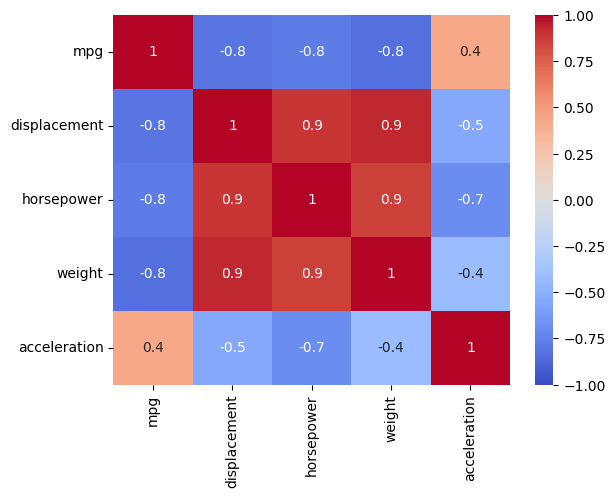

In [34]:
sns.heatmap(matrix, annot = True, fmt ='.1g', vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm')

**Answer:** Acceleration would be the most unlikely choice to pick as the independent variable because it has a correlation of .4 with mpg and that absolute value of correlation determines the strength of the relationship, although it does not automatically mean causation, and that is the lowest absolute correlation out of the independent variables and so I would not choose Acceleration.

### Exercise 1.2 - Pairplot (10 points)
Generate a pairplot(a.k.a. scatter plot matrix) of the given dataset. <br >
After generating the plot, answer the following question: <br >
**If we are using ``horsepower`` to predict ``mpg``, which method could lead to the best performance? (Linear Regression, Polynomial Regression, or Logistic Regression) Explain why.**

Note that there is no requirement on the diagonals. You can leave empty or use other representations based on your preference. However, having ``origin``-based grouped data distributions on the diagonals effectively helps you answer some questions in the later exercises.   

Requirements
 - The points should be colored based on the column ``origin``.

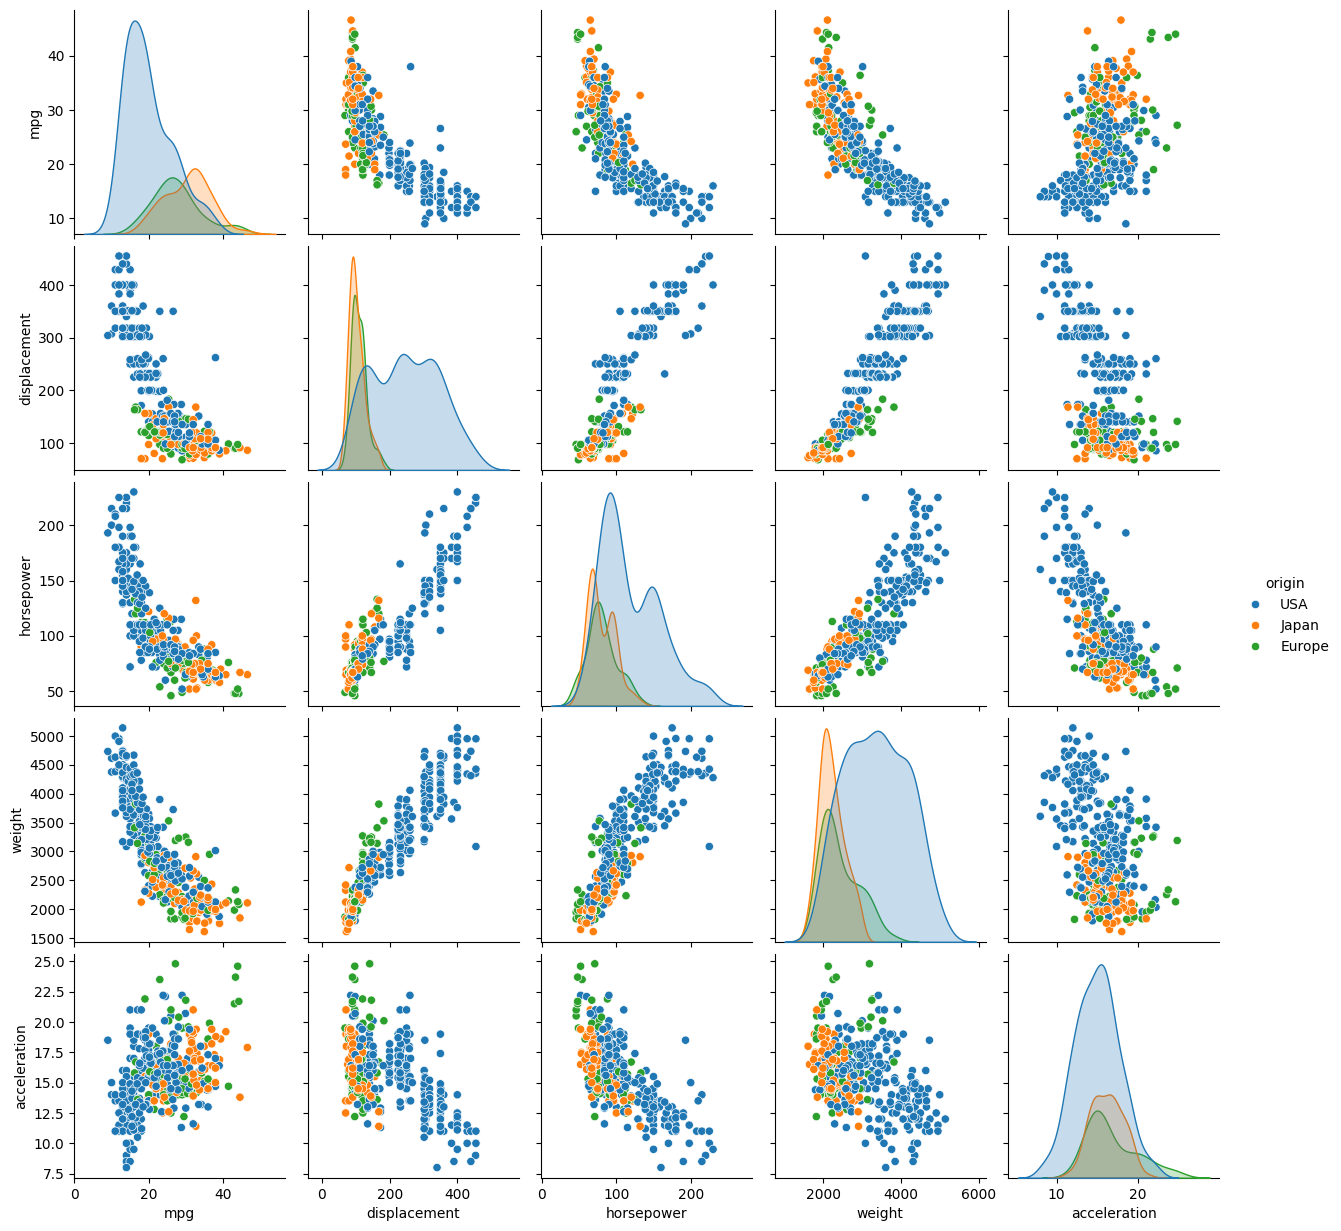

In [35]:
sns.pairplot(df, hue = 'origin')

**Answer:**

## Exercise 2 - Linear and Polynomial Regression (40 points in total)

### Exercise 2.1 - Splitting Dataset (5 points)
Split the data into training and testing set with the ratio of 80:20.

Print the shapes of the training and testing set.

In [36]:
X = df[['displacement']]
y = df['mpg']
X_train, X_test, y_train, y_test  = train_test_split(X, y, train_size = .8, test_size = .2, random_state = 21)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(313, 1) (313,) (79, 1) (79,)


### Exercise 2.2 - Simple Linear Regression (10 points)
Using one of the other attributes(excluding ``origin``) by your choice, please build a simple linear regression model that predicts ``mpg``. <br >

Requirements
 - Report the testing MSE error.

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
results = model.predict(X_test)

In [40]:
np.mean(((y_test - results) ** 2))

17.723267955516153

The MSE 17.723267955516153

### Exercise 2.3 - Polynomial Regression (25 points)
Build polynomial regression models that predict ``mpg`` with the same choice in 2.2. <br >
Specifically, from degree=2 to degree=4, build one respectively. <br >
Then, based on the reported errors from only these three degrees, **do you think there is a sign of overfitting? Provide your reasoning.**


Requirements
 - Report the training MSE error for each of the three degrees.
 - Report the testing MSE error for each of the three degrees.


In [41]:
from sklearn.preprocessing import PolynomialFeatures

In [42]:
poly2 = PolynomialFeatures(degree=2, include_bias=False)
poly3 = PolynomialFeatures(degree=3, include_bias=False)
poly4 = PolynomialFeatures(degree=4, include_bias=False)

poly2_features_train = poly2.fit_transform(X_train)
poly3_features_train = poly3.fit_transform(X_train)
poly4_features_train = poly4.fit_transform(X_train)

poly2_features_test = poly2.fit_transform(X_test)
poly3_features_test = poly3.fit_transform(X_test)
poly4_features_test = poly4.fit_transform(X_test)

poly2_model = LinearRegression()
poly3_model = LinearRegression()
poly4_model = LinearRegression()

poly2_model_reg = poly2_model.fit(poly2_features_train, y_train)
poly3_model_reg = poly3_model.fit(poly3_features_train, y_train)
poly4_model_reg = poly4_model.fit(poly4_features_train, y_train)

poly2_results = poly2_model.predict(poly2_features_test)
poly3_results = poly3_model.predict(poly3_features_test)
poly4_results = poly4_model.predict(poly4_features_test)

poly2_mse = np.mean((poly2_results - y_test) ** 2)
poly3_mse = np.mean((poly3_results - y_test) ** 2)
poly4_mse = np.mean((poly4_results - y_test) ** 2)

In [43]:
print(poly2_mse)
print(poly3_mse)
print(poly4_mse)

16.673304438818352
16.94670693932724
17.210778338864678


**Answer:**
I think that there are signs of overfitting in this model specifically with the higher degree polynomials because the MSE keeps increasing and I believe that is due to the function fitting the training data better and not generalizing as well which leads to higher MSE in the testing data

## Exercise 3 - Logistic Regression (35 points in total)

Now we are going to build a classification model on ``origin`` using all the other 5 attributes. <br >
Note that Logistic Regression is a binary classificaiton algorithm.

### Exercise 3.1 - Processing and Splitting the Dataset (5 points)
In this exercise 3, we only consider those observations where they originate from either "USA" or "Japan". <br >
So please **remove** those observations that originate from "Europe". <br >
And then, split the data into training and testing set with the ratio of 80:20. <br >

Print the shapes and the unique values of the training and testing set


In [44]:
df_log = df[(df['origin'] == 'USA') | (df['origin'] == 'Japan')]
X = df_log.drop(columns = {'origin'})
y = df_log['origin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 21)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(y_train.unique(),  y_test.unique())

(259, 5) (259,) (65, 5) (65,)
['USA' 'Japan'] ['Japan' 'USA']


### Exercise 3.2 - Logistic Regression (20 points)

Using all the other 5 attributes, please build a Logistic Regression model that distinguishes between cars from Japan and cars from the USA. <br><br>
Now, given the results from models and plots from the previous questions, what do you think a hypothetical model would look like (in terms of accuracy) **if we are distinguishing between Japan and Europe** (instead of Japan and USA)? What would change if anything? Provide your reasoning in the text box below. Feel free to make comparisons based on your previous observations and results.

Requirements
 - Report the testing precision and recall for both regions for the Japan vs. USA model.
 - Provide reasoning for potential difference in accuracy when comparing Japanese and European cars

In [45]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(random_state = 21)
logreg_model.fit(X_train, y_train)
preds = logreg_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
from sklearn.metrics import precision_score, recall_score
precision_usa = precision_score(y_test, preds, pos_label='USA')
precision_japan = precision_score(y_test, preds, pos_label='Japan')

recall_usa = recall_score(y_test, preds, pos_label='USA')
recall_japan = recall_score(y_test, preds, pos_label='Japan')

print('usa precision and recall: ', precision_usa, recall_usa)
print('japan precision and recall: ', precision_japan, recall_japan)

usa precision and recall:  0.8367346938775511 0.9318181818181818
japan precision and recall:  0.8125 0.6190476190476191


**Answer:** If we're distinguishing between cars made in Japan vs Europe, I think there is less of a distinction to choose from. European cars seem to be much smaller and more gas efficient which lines up with Japanes made cars, American cars are much bigger SUVs and Trucks dominate the market and so it would seem that that is a cause for distinction and one that could be used to distinguish better between the classes and because of this I would believe that the overall accuracy would decrease. This is supported by the plots above where American cars seem to be much more distinguishable than Japanese and European cars, with Japanes and European cars following similar distributions and statistics. 0.8367346938775511 and the recall was 0.9318181818181818
the japan precision was .8125 and the recall was 0.6190476190476191.

### Exercise 3.3 - Model coefficients (10 points)

Using all the attributes used in 3.2, plot the model coefficients in a scatter plot as shown in class. Explain the contribution of the top 3 coefficients, and interpret their meaning and their contribution to the $\hat{y}$ prediction. Example can be found [here](https://quantifyinghealth.com/interpret-logistic-regression-coefficients/)

In [47]:
print(X.columns)
logreg_model.coef_[0]


Index(['mpg', 'displacement', 'horsepower', 'weight', 'acceleration'], dtype='object')


array([-0.13449387,  0.11146627, -0.13625114, -0.00070825,  0.13097615])

<Axes: xlabel='None'>

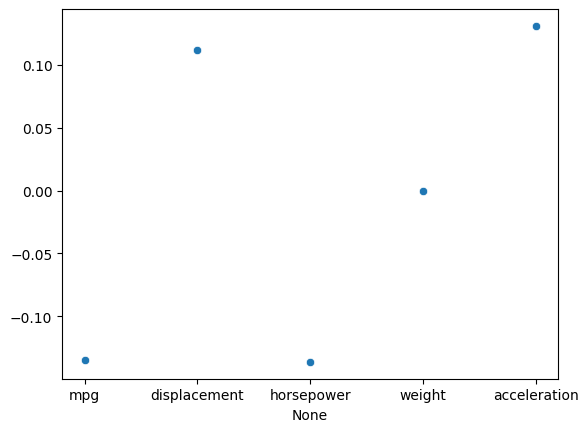

In [48]:
sns.scatterplot(x = X.columns,y = logreg_model.coef_[0])

**Answer:** mpg (-0.13449387), horsepower (-0.13625114), and acceleration (0.13097615). These show how the overall prediction is affected by the features, in terms of horsepower and mpg being negative they negatively affect the prediction and decreases the likelihood of a target outcome. While acceleration increases the likelihood of a target outcome. I chose these 3 as the top 3 because the absolute value (or magnitude) of these features is the greatest and has the overall greatest prediction influence on the model.

```
# This is formatted as code
```



## Exercise 4 - Collaborative Statement (5 points)

It is mandatory to include a Statement of Collaboration in each submission, that follows the guidelines below.
Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed.
All students are required to follow the academic honesty guidelines posted on the course website. For
programming assignments in particular, I encourage students to organize (perhaps using Piazza) to discuss the
task descriptions, requirements, possible bugs in the support code, and the relevant technical content before they
start working on it. However, you should not discuss the specific solutions, and as a guiding principle, you are
not allowed to take anything written or drawn away from these discussions (no photographs of the blackboard,
written notes, referring to Piazza, etc.). Especially after you have started working on the assignment, try to restrict
the discussion to Piazza as much as possible, so that there is no doubt as to the extent of your collaboration.

I worked alone on this assignment, I used chatgpt to check my code at certain areas, and I used the notebooks from lecture to cross reference my steps.

In [54]:
!jupyter nbconvert --to pdf hw1/HW1.ipynb # replace with your notebook name

[NbConvertApp] WARNING | pattern 'hw1/HW1.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Exe